In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('heart_short.xlsx',sheet_name="data")
df

,t_index,c_index,target
0,145,233,1
1,130,250,1
2,130,204,1
3,130,254,0
4,140,203,0
5,130,256,0
6,140,294,1
7,120,263,1
8,172,199,1
9,150,168,1


In [4]:
df.index

RangeIndex(start=0, stop=12, step=1)

In [5]:
# tạo tập dữ liệu input - x và output - y
X = df[['t_index','c_index']].values # input
y = df[['target']].values # output

# đảm bảo dữ liệu là kiểu số thực
X = X.astype(float)
y = y.astype(float)

In [6]:
# chia tập dữ liệu thành 2 tập training và testing

# chia thành 7 mẫu train và 7 mẫu test (tỉ lệ 60:40)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, X_indices_train, X_indices_test  = train_test_split(X, y, df.index, test_size=0.4, random_state=34)

# câu hỏi: hãy cho biết những dòng dữ liệu nào được lấy ngẫu nhiên vào tập test và ngẫu nhiên vào tập train
X_test, X_indices_test

(array([[145., 233.],
        [140., 268.],
        [172., 199.],
        [130., 204.],
        [120., 263.]]),
 Index([0, 11, 8, 2, 7], dtype='int64'))

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=5)

knnModel.fit(X_train, y_train)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [8]:
y_test_predicted = knnModel.predict(X_test)
y_test_predicted

array([0., 0., 0., 0., 0.])

<h1>Phương pháp hệ số độ chính xác (accuracy)</h1>

In [9]:
# Để đánh giá độ chính xác của mô hình với độ đo accuracy trên tập test
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_predicted)

0.2

In [10]:
# hoặc dùng để đánh giá độ chính xác của mô hình với độ do accuracy trên tập test
knnModel.score(X_test, y_test)

0.2

In [11]:
# câu hỏi: tập giá trị của nhãn để dự báo là gì
classes = knnModel.classes_
classes

array([0., 1.])

In [12]:
# câu hỏi 2: tính xác suất tiền quyết định trên tập mẫu
y_test_prob = knnModel.predict_proba(X_test)
y_test_prob

array([[0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4]])

In [13]:
# câu hỏi: nếu thiết lập lại ngưỡng quyết định là 0.85 thì kết quả accuracy 
print('prediction with threshhold 0.85: ')
y_pred_test_new_085 = (knnModel.predict_proba(X_test)[:,1] >= 0.85).astype(float)
y_pred_test_new_085

prediction with threshhold 0.85: 


array([0., 0., 0., 0., 0.])

<h1>Phương pháp confusion matrix</h1>

True Positive: số lượng điểm của lớp positive được phân loại đúng là positive <br>
True Negative: số lượng điểm của lớp negative được phân loại đúng là negative <br>
False Positive: số lượng điểm của lớp positive bị phân loại là negative <br>
False Negative: số lượng điểm của lớp negative bị phân loại là positive

In [14]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_test_predicted)

tn, fp, fn, tp = cf_matrix.ravel()

print(f'{tn}, {fp}, {fn}, {tp}')

1, 0, 4, 0


<h1>Phương pháp dùng độ đo TPR, FNR, FPR, TNR</h1>

TPR: tỉ lệ đoán đúng = TP / (TP + FN) <br>
FNR: tỉ lệ đoán nhầm = FN / (TP + FN) <br>
FPR: tỉ lệ bỏ sót = FP / (FP + TN) <br>
TNR: tỉ lệ đoán đúng = TN / (FP + TN)  <br>



In [15]:
print(f'tpr: {tp / (tp +fn)}')
print(f'fnr: {fn / (tp +fn)}')
print(f'fpr: {fp / (fp +tn)}')
print(f'tnr: {tn / (fp +tn)}')

tpr: 0.0
fnr: 1.0
fpr: 0.0
tnr: 1.0


<h1>Phương pháp dùng biểu đồ AUC ROC</h1>

Cân chỉnh tỉ lệ bỏ sót và đoán nhầm. Miền diện tích càng lớn thì càng tốt, trên đường màu đỏ

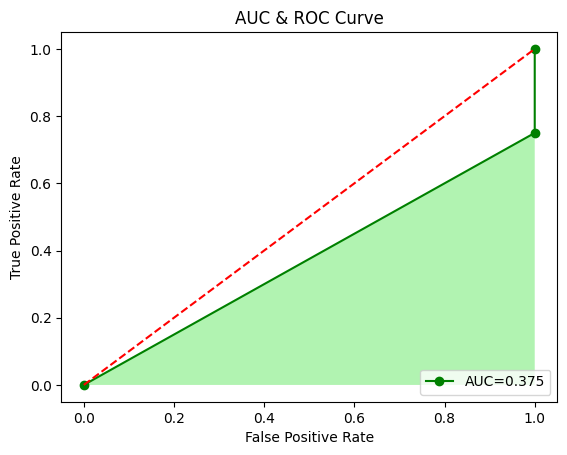

In [16]:
from sklearn import metrics

y_pred_proba = knnModel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,'go-',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()

<h1>Phương pháp precision recall f1</h1>

presicion thể hiện sự chuẩn xác của việc phát hiện các điểm positive. Tăng precision giảm đoán nhầm
recall thể hiện khả năng phát hiện tất cả các positive. Tăng recall giảm bỏ sót

presicion = tp / (tp + fp)
recall = tp / (tp + fn)

In [17]:
# from sklearn.metrics import confusion_matrix
# cf_matrix = confusion_matrix(y_test, y_test_predicted)

# cf_matrix

# def myscores(smat): 
#     tp = smat[0][0] 
#     fp = smat[0][1] 
#     fn = smat[1][0] 
#     tn = smat[1][1] 
#     vprecision = tp/(tp+fp)
#     vrecall = tp/(tp+fn)
#     vf1 = 2*(vprecision*vrecall)/(vprecision+vrecall) 

#     return vprecision,vrecall,vf1
# print("precision, recall, f1:", myscores(cf_matrix))

from sklearn.metrics import classification_report
target_names = ['Không bệnh', 'Có bệnh']
print(classification_report(y_test, y_test_predicted, target_names=target_names))

              precision    recall  f1-score   support

  Không bệnh       0.20      1.00      0.33         1
     Có bệnh       0.00      0.00      0.00         4

    accuracy                           0.20         5
   macro avg       0.10      0.50      0.17         5
weighted avg       0.04      0.20      0.07         5



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<h1>Xây dựng chương trình dự báo dạng console application</h1>

In [18]:
# lưu mô hình huẩn luyện
import pickle
pickle.dump(knnModel, open('model_KNN_Heart.sav', 'wb'))

In [19]:

#Load model từ storage
loaded_model = pickle.load(open('model_KNN_Heart.sav', 'rb'))

v1 = float(input('t_index: '))
v2 = float(input('c_index: '))

y_pred = loaded_model.predict([[v1,v2]])
print('Kết quả dự báo bệnh tim: '+ str(y_pred[0]))

if (y_pred[0] == 1):
    print("Bị bệnh tim")
else:
    print("Không bị bệnh")

ValueError: could not convert string to float: ''